## Selecting a Real World Data Set.

The dataset that has been selected is an interesting one on kaggle [new-york-city-airbnb-market](https://www.kaggle.com/datasets/ebrahimelgazar/new-york-city-airbnb-market). Airbnb is  a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves. 
I have selected this due to my interest of recent in real estate.


This data file includes all needed information from guests name, id, date, neighborhood name and it's listing price to rooms and its type. 

This dataset contains 2 CSV files and 1 XLSX file.

We will download it by installing `opendatasets`

In [1]:
#installing opendataset.
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


It is also needed that `openpyxl` is installed for reading `EXCEL` files to `pandasDataframe`.

In [2]:
!pip install openpyxl 


Defaulting to user installation because normal site-packages is not writeable


In [3]:
#import opendataset for use as "od"
import opendatasets as od

In [4]:
#Downloading the data set from kaggle.

#Step:
#get the link address and download using "od".

dataset_url = 'https://www.kaggle.com/datasets/ebrahimelgazar/new-york-city-airbnb-market'
od.download(dataset_url)


Skipping, found downloaded files in ".\new-york-city-airbnb-market" (use force=True to force download)


# Data Preparation and Cleaning

Installing and importing the essensial libraries for data manipulation.

- `numpy`: Python library for Numerical computing.
- `pandas`: Python library for working with data, stores data Dataframe.
- `datetime`: Python module used for date and time manipulation by pandas.


In [5]:
#import data manipulation tools.
import pandas as pd 
import numpy as np 
import datetime as dt


### Loading Dataset into a Pandas Dataframe.

The data being in `CSV` format can be easily loaded into a dataframe by using the `pd.read_csv` method.
Also read the `EXCEL` file into a `pandasDataframe` with `pd.read_excel` method.

In [6]:
NY_review = pd.read_csv("airbnb_last_review.csv")

NY_price = pd.read_csv("airbnb_price.csv") 

NY_type_room = pd.read_excel("airbnb_room_type.xlsx")



We now have 3 dataset to explore:
`NY_last_review`, `NY_price` and `NY_type_room`. 
Let's have an overview of them.

In [7]:
NY_review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [8]:
NY_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [9]:
NY_type_room.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


### Exploring the Number of Rows, Columns, Range of values, e.t.c. 

**-Number of Rows and Column, storage and data type**

To get the number of `rows` and `column`, `storage` and `dtype`for our dataset the `.info` method will go a long way to help.

In [10]:
NY_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


RangeIndex: 25209 entries, 0 to 25208

Data columns (total 3 columns)

dtypes: int64(1), object(2)

memory usage: 394.0+ KB 

In [11]:
NY_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


RangeIndex: 25209 entries, 0 to 25208

Data columns (total 3 columns):

dtypes: int64(1), object(2)

memory usage: 394.0+ KB

In [12]:
NY_type_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


RangeIndex: 25209 entries, 0 to 25208

Data columns (total 3 columns):

dtypes: int64(1), object(2)

memory usage: 394.0+ KB

**-info:**
The three datasets contain `25209` rows and `3` columns each, a memory usage of `394.0+ KB` and a column of integer values and 2 columns of object datatypes each.


### Cleaning the NY_price dataset 

Looking at the `price` column of the `NY_price` dataset we would have realised that the data type is not integer `(100)`$ as we would have expected but a string object like `100 dollars`. This has to be converted to a numerical data to further carry out price averaging when needed.

In [13]:
# Removing white spaces and strings  from the price column.
NY_price["price"] = NY_price["price"].str.replace(" dollars","") 

# Converting price column to a numeric data type.
NY_price["price"] = pd.to_numeric(NY_price["price"])

# Display NY_price Dataframe.
NY_price.head()



,listing_id,price,nbhood_full
0,2595,225,"Manhattan, Midtown"
1,3831,89,"Brooklyn, Clinton Hill"
2,5099,200,"Manhattan, Murray Hill"
3,5178,79,"Manhattan, Hell's Kitchen"
4,5238,150,"Manhattan, Chinatown"


The info should have changed slightly in terms of data type and probably storage.

In [14]:
NY_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  int64 
 2   nbhood_full  25209 non-null  object
dtypes: int64(2), object(1)
memory usage: 591.0+ KB


**-Range of Values**

We might want to explore the range of `id` and other numerical features of the records in the New York rental dataset.

This can be done efficiently by
using the `.describe` method.

In [15]:
NY_review.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


In [16]:
NY_price.describe()

,listing_id,price
count,2.520900e+04,25209.000000
mean,2.068922e+07,141.777936
std,1.102928e+07,147.349137
min,2.595000e+03,0.000000
25%,1.202273e+07,69.000000
50%,2.234391e+07,105.000000
75%,3.037669e+07,175.000000
max,3.645581e+07,7500.000000


In [17]:
NY_type_room.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


This above tables show the `count( number of entries for each numerical column)`, `mean`, `standard deviation (std)`, `minimum value`, `maximum value`, `25th percentile (25%)`, `50th percentile (50%)`, and `75th percentile (70%)`. and contains the `listing_id` and `price` columns as the only numerical columns.


### Cleaning the NY_type_room Dataset 

Let's look at the room types available by using the `'.unique'` method on the column `'room_type'`.

In [18]:
# Getting available room types.

NY_type_room["room_type"].unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

The room are types written in different cases.

- 'private room'
- 'Private room' 
- 'PRIVATE ROOM'

The unique room types will be the following by converting them to `lower case`:
- 'private room'
- 'entire home/apt'
- 'shared room'


In [19]:
# Convert room_type column to lower_case.
NY_type_room["room_type"] =  NY_type_room["room_type"].str.lower()

# Change the room_type column to category data type.
NY_type_room["room_type"] = NY_type_room["room_type"].astype("category")

# Getting room type occurence from the airbnb dataset.
room_frequencies = NY_type_room["room_type"].value_counts()
room_frequencies 



entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

The "entire home/apt" takes `52.6%` of the airbnb list and "private room" took `45%` of the listing.

### -Additional Steps

- Parsing dates 
- Removing unecessary columns
- Creating additional columns 
- merging multiple dataset 



In [20]:
NY_review.sample(5)

,listing_id,host_name,last_review
22584,33776576,Marie-Claire,July 01 2019
4303,6862191,David,May 27 2019
18148,29829412,Anna & Frank,June 18 2019
16131,27652402,Daisy,June 24 2019
3642,5295884,Lisa E,July 06 2019


### Parsing Dates in the NY_review Dataset 

Looking at the `NY_review` Dataframe, the `last_review` column contains date in the format `"Month Day Year"`.e.g.
- July 06 2019

 signifying the last review for each of the listed properties on airbnb.

We might want to know which of these rental apartments have the latest review and which one has the oldest review for futher analysis. So, it's needed to convert the last_review column to `datetime` data type for correct handlings.


In [21]:
# Convert to datetime.
NY_review["last_review"] = pd.to_datetime(NY_review.last_review) 

# Oldest review date and Latest review date.
oldest_review = NY_review["last_review"].min()
latest_review = NY_review["last_review"].max()
print("Oldest Review Date:", oldest_review,'\n',
      "Latest Review Date:", latest_review )




Oldest Review Date: 2019-01-01 00:00:00 
 Latest Review Date: 2019-07-09 00:00:00


The oldest review is from the first month of 2019 `January` and we have the latest to be the 7th month `July`.

In [22]:
# To get the unique days that reviews were made:
review_days = np.size(NY_review["last_review"].unique())
print(f"there were {review_days} unique days between {oldest_review} and {oldest_review} in 2019."  )


there were 190 unique days between 2019-01-01 00:00:00 and 2019-01-01 00:00:00 in 2019.


In [23]:
NY_review.sample(3)

,listing_id,host_name,last_review
7804,15116599,Carol,2019-07-02
12676,22419249,Chris,2019-05-28
6459,12397447,Aldo,2019-06-21


### Merging Multiple Datasets
 
We will be merging the datasets:
- NY_price
- NY_review
- NY_type_room

Drop unnecessary columns, invalid rows and create additional columns if necessary to gain more insight to the dataset.

In [24]:
NY_price["listing_id"].dtype

dtype('int64')

In [25]:
NY_review["listing_id"].dtype

dtype('int64')

In [26]:
NY_type_room["listing_id"].dtype

dtype('int64')

All this dataset have the column `listing id` in common, so the tables will be merged using the column `listing id` as the relationship.

In [27]:
# Merging price and review 
NY_price_review = NY_price.merge(NY_review, on = "listing_id") 

# Merging NY_type_room with NY_price_review.
NY_rental_merged = NY_type_room.merge(NY_price_review, on = "listing_id")

# Dropping the host column 
NY_rental_merged.drop(columns = ["host_name"], inplace = True)
NY_rental_merged




,listing_id,description,room_type,price,nbhood_full,last_review
0,2595,Skylit Midtown Castle,entire home/apt,225,"Manhattan, Midtown",2019-05-21
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,"Brooklyn, Clinton Hill",2019-07-05
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,"Manhattan, Murray Hill",2019-06-22
3,5178,Large Furnished Room Near B'way,private room,79,"Manhattan, Hell's Kitchen",2019-06-24
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,"Manhattan, Chinatown",2019-06-09
...,...,...,...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,private room,129,"Manhattan, Upper East Side",2019-07-07
25205,36427429,No.2 with queen size bed,private room,45,"Queens, Flushing",2019-07-07
25206,36438336,Seas The Moment,private room,235,"Staten Island, Great Kills",2019-07-07
25207,36442252,1B-1B apartment near by Metro,entire home/apt,100,"Bronx, Mott Haven",2019-07-07


Let's get a subset of free listings on the airbnb NYC listing and then remove them to further analysis on the NY_rental_merged dataframe.

In [28]:
# prices at 0$ are reffered to as free listing.
free_listings = NY_rental_merged[NY_rental_merged["price"] == 0]
free_listings


,listing_id,description,room_type,price,nbhood_full,last_review
10861,20333471,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,0,"Bronx, East Morrisania",2019-06-24
10958,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,0,"Brooklyn, Bushwick",2019-05-18
11023,20639628,Spacious comfortable master bedroom with nice ...,private room,0,"Brooklyn, Bedford-Stuyvesant",2019-06-15
11024,20639792,Contemporary bedroom in brownstone with nice view,private room,0,"Brooklyn, Bedford-Stuyvesant",2019-06-21
11025,20639914,Cozy yet spacious private brownstone bedroom,private room,0,"Brooklyn, Bedford-Stuyvesant",2019-06-23
11577,21291569,Coliving in Brooklyn! Modern design / Shared room,shared room,0,"Brooklyn, Bushwick",2019-06-22
11589,21304320,Best Coliving space ever! Shared room.,shared room,0,"Brooklyn, Bushwick",2019-05-24


Most of the free listings can be found in Brooklyn ( Stuyvesant and Bushwick neighbourhoods ), free listings are mostly due to special offers from hosts. They mostly `private rooms` here and majority were last reviewed in june.

In [29]:
# update NY_rental_merged by removing free listings 
NY_rental_merged = NY_rental_merged.loc[NY_rental_merged["price"] != 0]
NY_rental_merged



,listing_id,description,room_type,price,nbhood_full,last_review
0,2595,Skylit Midtown Castle,entire home/apt,225,"Manhattan, Midtown",2019-05-21
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,"Brooklyn, Clinton Hill",2019-07-05
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,"Manhattan, Murray Hill",2019-06-22
3,5178,Large Furnished Room Near B'way,private room,79,"Manhattan, Hell's Kitchen",2019-06-24
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,"Manhattan, Chinatown",2019-06-09
...,...,...,...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,private room,129,"Manhattan, Upper East Side",2019-07-07
25205,36427429,No.2 with queen size bed,private room,45,"Queens, Flushing",2019-07-07
25206,36438336,Seas The Moment,private room,235,"Staten Island, Great Kills",2019-07-07
25207,36442252,1B-1B apartment near by Metro,entire home/apt,100,"Bronx, Mott Haven",2019-07-07


In [30]:
NY_rental_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25202 entries, 0 to 25208
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25202 non-null  int64         
 1   description  25192 non-null  object        
 2   room_type    25202 non-null  category      
 3   price        25202 non-null  int64         
 4   nbhood_full  25202 non-null  object        
 5   last_review  25202 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 1.2+ MB


Up to 7 rows were dropped.

Lets add columns that will help futher our analysis.
A `price per month` column.
Also we might want to see the price distributions accross the boroughs, so a column `borough` will be added.
Columns showing `day`, `week`, `month` of last reviews to observe trends closely. 

In [31]:
# Add price_per_month to the NY_rental_merged Dataframe.
NY_rental_merged.loc[:, ("price_per_month")] = round(NY_rental_merged.loc[:, ("price")] * 365 / 12, 2)

# add a column containing entries of borough and neighbourhood a rental listing can be found.
NY_rental_merged.loc[:, ("borough")] = NY_rental_merged["nbhood_full"].str.partition(",")[0] 

NY_rental_merged.loc[:, ("neighborhood")] = NY_rental_merged["nbhood_full"].str.partition(",")[2] 

NY_rental_merged["day"] = pd.DatetimeIndex(NY_rental_merged.last_review).day
NY_rental_merged["weekday"] = pd.DatetimeIndex(NY_rental_merged.last_review).weekday
NY_rental_merged["month"] = pd.DatetimeIndex(NY_rental_merged.last_review).month

NY_rental_merged.drop(columns = ["nbhood_full"], inplace = True)


NY_rental_merged

C:\Users\Dr. Okanlawon\AppData\Local\Temp\ipykernel_5564\3091551808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_rental_merged.loc[:, ("price_per_month")] = round(NY_rental_merged.loc[:, ("price")] * 365 / 12, 2)
C:\Users\Dr. Okanlawon\AppData\Local\Temp\ipykernel_5564\3091551808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_rental_merged.loc[:, ("borough")] = NY_rental_merged["nbhood_full"].str.partition(",")[0]
C:\Users\Dr. Okanlawon\AppData\Local\Temp\ipykernel_5564\3091551808.py:7: Se

,listing_id,description,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,2595,Skylit Midtown Castle,entire home/apt,225,2019-05-21,6843.75,Manhattan,Midtown,21,1,5
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,2019-07-05,2707.08,Brooklyn,Clinton Hill,5,4,7
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,2019-06-22,6083.33,Manhattan,Murray Hill,22,5,6
3,5178,Large Furnished Room Near B'way,private room,79,2019-06-24,2402.92,Manhattan,Hell's Kitchen,24,0,6
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,2019-06-09,4562.50,Manhattan,Chinatown,9,6,6
...,...,...,...,...,...,...,...,...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,private room,129,2019-07-07,3923.75,Manhattan,Upper East Side,7,6,7
25205,36427429,No.2 with queen size bed,private room,45,2019-07-07,1368.75,Queens,Flushing,7,6,7
25206,36438336,Seas The Moment,private room,235,2019-07-07,7147.92,Staten Island,Great Kills,7,6,7
25207,36442252,1B-1B apartment near by Metro,entire home/apt,100,2019-07-07,3041.67,Bronx,Mott Haven,7,6,7


Let's check for `na` values and duplicates.

In [32]:
# Dropping na values 
NY_rental_merged.dropna(inplace=True)
NY_rental_merged

C:\Users\Dr. Okanlawon\AppData\Local\Temp\ipykernel_5564\1342814575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_rental_merged.dropna(inplace=True)


,listing_id,description,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,2595,Skylit Midtown Castle,entire home/apt,225,2019-05-21,6843.75,Manhattan,Midtown,21,1,5
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,2019-07-05,2707.08,Brooklyn,Clinton Hill,5,4,7
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,2019-06-22,6083.33,Manhattan,Murray Hill,22,5,6
3,5178,Large Furnished Room Near B'way,private room,79,2019-06-24,2402.92,Manhattan,Hell's Kitchen,24,0,6
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,2019-06-09,4562.50,Manhattan,Chinatown,9,6,6
...,...,...,...,...,...,...,...,...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,private room,129,2019-07-07,3923.75,Manhattan,Upper East Side,7,6,7
25205,36427429,No.2 with queen size bed,private room,45,2019-07-07,1368.75,Queens,Flushing,7,6,7
25206,36438336,Seas The Moment,private room,235,2019-07-07,7147.92,Staten Island,Great Kills,7,6,7
25207,36442252,1B-1B apartment near by Metro,entire home/apt,100,2019-07-07,3041.67,Bronx,Mott Haven,7,6,7


Up to 10 rows were dropped.

To check for duplicates:

In [33]:
# checking duplicates.
NY_rental_merged.duplicated().sum()


0

There's no duplicate, 

looks like this Dataframe is cleaned to a large extent.

We can now futher our analysis smoothly and steadily.

## Step 3: Perform exploratory analysis & visualization¶
- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

## Exploratory Analysis and Visualization 

Let's start this aspect by computing the numeric statistics.
`.describe` method is used.

In [34]:
NY_rental_merged.describe() 


,listing_id,price,price_per_month,day,weekday,month
count,2.519200e+04,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,2.069363e+07,141.845348,4314.462650,15.631192,3.277032,5.467252
std,1.103045e+07,147.371559,4482.551597,9.929009,2.251377,1.517278
min,2.595000e+03,10.000000,304.170000,1.000000,0.000000,1.000000
25%,1.203714e+07,69.000000,2098.750000,6.000000,1.000000,5.000000
50%,2.235279e+07,105.000000,3193.750000,17.000000,4.000000,6.000000
75%,3.037767e+07,175.000000,5322.920000,24.000000,6.000000,6.000000
max,3.645581e+07,7500.000000,228125.000000,31.000000,6.000000,7.000000


The average price per night on the airbnb listings is `141$` while third-quarter of the listings have their prices to be `175$` or below per night. 

There are outliers, the `7500$` per night! is very striking. And a price as low as `10$` per night is available.

We also have an average price per month of `4314$` 

Let's have the numerical statistics based on the borough.

In [35]:
# borough numerical stats.
b_numeric_stats = NY_rental_merged[["borough", "price", "price_per_month"]].groupby("borough").agg(["sum", "mean", "min", "max"])

b_numeric_stats


price                       price_per_month               \
                   sum        mean min   max             sum         mean   
borough                                                                     
Bronx            55231   79.241033  20   670      1679942.85  2410.247991   
Brooklyn       1275435  122.016168  10  7500     38794481.31  3711.325104   
Manhattan      1898963  184.025875  10  5100     57760124.63  5597.453690   
Queens          320765   92.813947  10  2600      9756601.76  2823.090787   
Staten Island    22974   86.044944  13   300       698792.53  2617.200487   

                                  
                  min        max  
borough                           
Bronx          608.33   20379.17  
Brooklyn       304.17  228125.00  
Manhattan      304.17  155125.00  
Queens         304.17   79083.33  
Staten Island  395.42    9125.00

Yeah! so Brooklyn has the maximum price per night of `7500$` the least price of `10$`, Manhattan and Queens.
Obviously the largest range of prices would be going to Brooklyn the second largest in terms of price sum.
Manhattan has the highest average price and average price per month of `184$` and `5597$` which beats the airbnb market average of `4314$`
Staten Island as the lowest range of rental price. This might be due to low development or some other factors. `READ ON STATEN ISLAND` for more insights.

Let's see by how many percent did Manhattan beat the airbnb market average:

In [36]:
# percentage hike in average price.
percentage_beat = round((b_numeric_stats.price_per_month.loc["Manhattan","mean"] - NY_rental_merged.price_per_month.mean())*100 / NY_rental_merged.price_per_month.mean(), 2)

print(f"Manhattan beats the airbnb market average price per month by {percentage_beat}%")


Manhattan beats the airbnb market average price per month by 29.74%


### Distribution of Numeric Columns using Histogram 

Lets look at how distributed the prices are, we will be able to see which price has the highest frequencies among other insights.
We will import some manipulation tools for this:
- Matplotlib: Used for plotting and visualizations of datasets in python. The `pyplot` module will be used frequently and its imported with the alias `pyplot`.

- Seaborn: It's built on top of matplotlib to make beautiful and attractive visualizations. imported as `sns`.

- %matplotlib inline: A magic command that sets the backend of matplotlib to the inline backend.


In [37]:
# import Visualization libraries.
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Magic command 
%matplotlib inline


In [38]:
# configure styles.
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 11
matplotlib.rcParams["figure.figsize"] = (10,4)
matplotlib.rcParams["figure.facecolor"] = "#00000000"


**Let us see how frequent are the listings as the price ranges from `10$` to `7500$`**

For legibility we will take about about 4 to 5 plots of different range of prices.

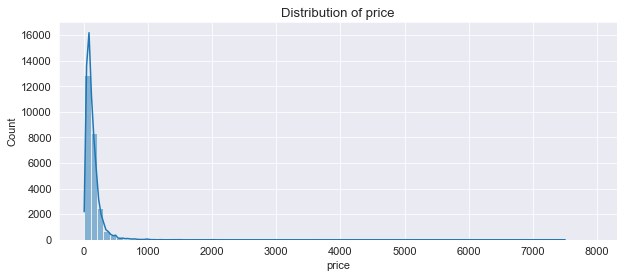

In [39]:
# plot title.
plt.title("Distribution of price")

# plot histogram.
sns.histplot(NY_rental_merged.price,
             kde = True,
             bins = np.arange(10,8000,100));



We can immediately see that the price ranges from `10$` to `7500$`.
It is evident that the number of listings reduces as the price increases by (100$).
Let's look at it more clearly.

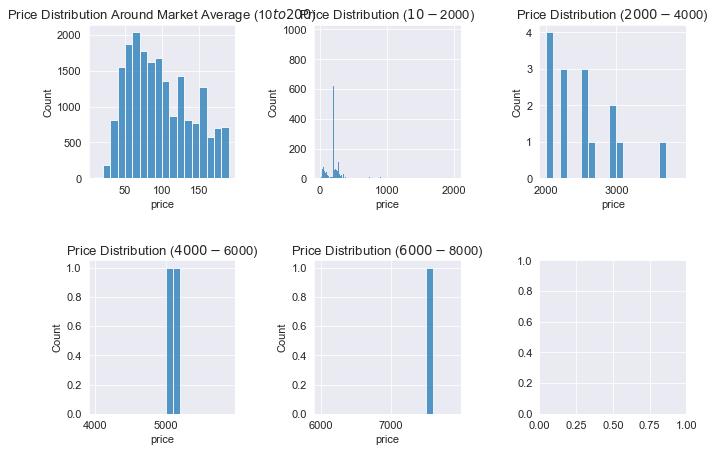

In [40]:
fig, axes = plt.subplots(2,3, figsize = (10,7))

# price distribution around airbnb market average price 10$ to 200$.
# market average = 141$ 
axes[0,0].set_title("Price Distribution Around Market Average (10$ to 200$)")
sns.histplot(NY_rental_merged.price,
             kde = False,
             bins = np.arange(10,200, 10),
             ax = axes[0,0]);

# price: 10$ to 2000$
axes[0,1].set_title("Price Distribution ($10 - $2000)")
sns.histplot(NY_rental_merged.price,
             kde = False,
             bins = np.arange(10,2000),
             ax=axes[0,1]);

# price 2000$ to 4000$
axes[0,2].set_title("Price Distribution ($2000 - $4000)")
sns.histplot(NY_rental_merged.price,
             kde = False,
             bins = np.arange(2000,4000,100),
             ax=axes[0,2]);
             
#  price 4000$ to 6000$.
axes[1,0].set_title("Price Distribution ($4000 - $6000)")
sns.histplot(NY_rental_merged.price,
             kde = False,
             bins = np.arange(4000,6000,100),
             ax=axes[1,0]);

#  price 6000$ to 8000$
axes[1,1].set_title("Price Distribution ($6000 - $8000)")
sns.histplot(NY_rental_merged.price,
             kde = False,
             bins = np.arange(6000,8000,100),
             ax=axes[1,1]);
             
# setting spacings between Visualizations.
plt.tight_layout(pad = 3)

    

So price range of `10$` to `110$` has the highest frequency on the listing, with `12,000+` listings on airbnb.

**Let's take a look at how often a borough is listed.**

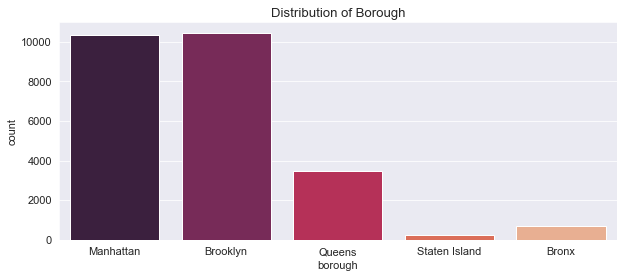

In [41]:
plt.title("Distribution of Borough")
sns.countplot(x="borough",
             #kde=False,
             data = NY_rental_merged,
             palette = "rocket");



Yeah, so Brooklyn is the most frequent borough on the listing and just a little more frequent than Manhattan. Staten Island as a very low frequency.
`price:frequency` RELATIONSHIP?

**Let's look at the distribution of last_review using a histogram.**

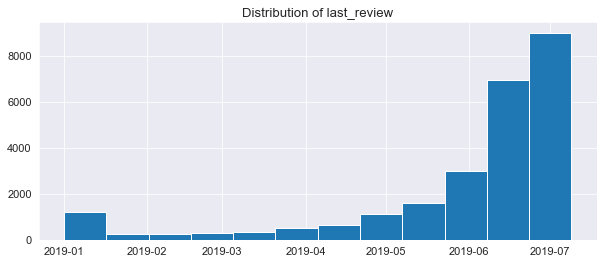

In [42]:
plt.title("Distribution of last_review")
plt.hist(NY_rental_merged.last_review,
        bins = 12);

At the beginning of 2019 there were about `1000+` reviews by the seventh month there the number of review has reached almost `12000`. 
Much more rental apartments got reviewed of recent.
Also there's has been a continuous increase in the number of recent reviews, the latter months of the last_review experienced high review rate.
So, a large percentage of rental apartments on the airbnb listings has their last reviews to be of recent.

**Let's look at how frequently a room type is listed**

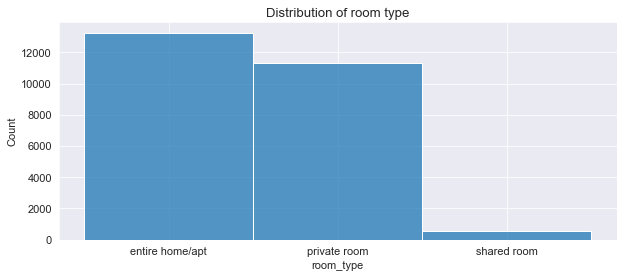

In [43]:
plt.title("Distribution of room type")
sns.histplot(x="room_type",
             kde=False,
             data=NY_rental_merged);


Evidently, there are much more listings for entire hime/apt and private room types compared to shared rooms on airbnb market.

### Exploring Relationship between Columns.

Now let's look at the relationship between the features using visuals.

**Let's compare price column to last review with the boroughs**

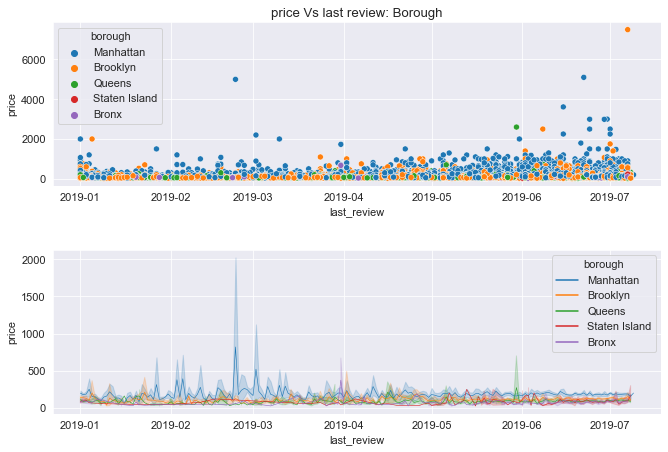

In [44]:
fig, axes = plt.subplots(2, figsize = (10,7))
axes[0].set_title("price Vs last review: Borough")

# using scatterplot and lineplot.
sns.scatterplot(x="last_review",
                y="price",
                hue="borough",
                data=NY_rental_merged,
                ax = axes[0]
          )

sns.lineplot(x=NY_rental_merged.last_review,
             y=NY_rental_merged.price,
             linewidth = .6,
             hue=NY_rental_merged.borough,
             ax = axes[1])
plt.tight_layout(pad = 3);


The scatter plot shows that the relationship between the last review and the price is not linear, and it is discovered that the were more reviews around May, June, July' which seems to have caused a reduced deviation in prices as can be deduced from the line plot.

## Relationships to EXPLORE:

- room type:price (which room types are the most expensives)
- listing frequency: price **checked**
- last review: average price ( did the price increase as the year comes toward mid year ) scatter plot or line plot or heat map. **RESULT: Price stability which is probably due to increased patronage was observed towards mid year.**
- borough:last review (which boroughs have more reviews) scatter plot
- room type:last review ( how often are certain room types reviewed ) scatter plot.
- Listing frequency: last review

**room type to price.**

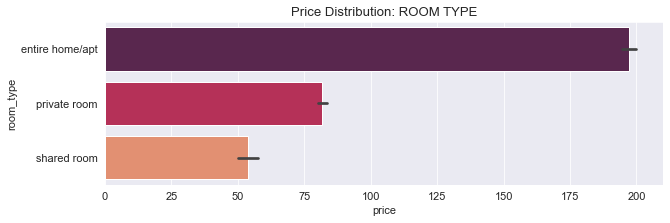

In [45]:
matplotlib.rcParams["figure.figsize"] = (10,3)
plt.title("Price Distribution: ROOM TYPE")
sns.barplot(x="price",
            y="room_type",
            data = NY_rental_merged,
           palette = "rocket");

As we would have expected, the Entire home apartment costs much more compared to private rooms and shared rooms.

**Note:** majority of the price listings are 175$ and below, I believe that's what is represented here and the deviation of price per room type is represented with the black line. 

There's much deviation among prices of shared room and entire room apartment.

**Comparing rental income to no of reviews**

In [46]:
ordered_review = NY_rental_merged.copy().groupby("last_review")[["price"]].agg(["sum", "mean"])
ordered_review["no_of_reviews"] = NY_rental_merged.copy().groupby("last_review")["listing_id"].count()
ordered_review

price             no_of_reviews
                sum        mean              
last_review                                  
2019-01-01    63146  158.658291           398
2019-01-02    43899  146.819398           299
2019-01-03    19814  145.691176           136
2019-01-04     9928  136.000000            73
2019-01-05     9548  161.830508            59
...             ...         ...           ...
2019-07-05    82535  142.301724           580
2019-07-06    78359  138.934397           564
2019-07-07   104447  145.469359           718
2019-07-08     9335  104.887640            89
2019-07-09      200  200.000000             1

[190 rows x 3 columns]

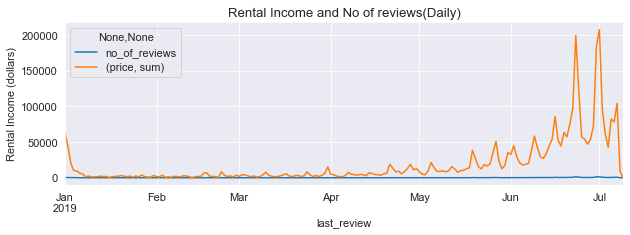

In [47]:
plt.title("Rental Income and No of reviews(Daily)")
ordered_review.no_of_reviews.plot(legend = True)
ordered_review.loc[:, ("price", "sum")].plot(legend = True)
plt.ylabel("Rental Income (dollars)");


this visualization shows the relatiomship between total rent income per day on airbnb and the no of reviews per day. There is an increase in rental income per day with increasing number of reviews.

**See the relationship between the trend in last reviews and average price of rental apartments**

We can have this in two different line plots:
- First; showing number of reviews per day.
- Second; Showing the averege price trend per day through the dataset.

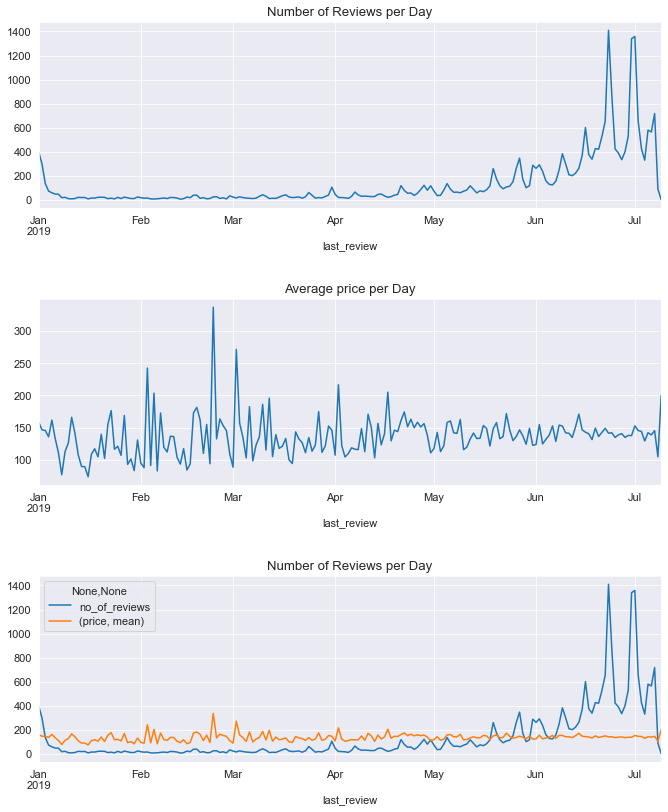

In [48]:
fig, axes = plt.subplots(3,1 , figsize = (10,12))

axes[0] = ordered_review.no_of_reviews.plot(ax = axes[0])
axes[0].set_title("Number of Reviews per Day")

axes[1] = ordered_review.loc[:, ("price", "mean")].plot(ax = axes[1])
axes[1].set_title("Average price per Day")

axes[2] = ordered_review.no_of_reviews.plot(legend = True, ax = axes[2])
axes[2] = ordered_review.loc[:, ("price", "mean")].plot(legend = True, ax = axes[2])
axes[2].set_title("Number of Reviews per Day")

plt.tight_layout(pad = 3);

There seems to be stability in the price of renting apartments by May, June and July and increased no of reviews as opposed to February, March and April which experienced price instability, that might be related to the low number of patronage. There might be a kind of relationship between the average price and the number of reviews.

**borough:latest reviews (which boroughs have more reviews) scatter plot**

To visualize this, we would be looking at the later months of May, June and July. From these we have high number of reviews and it's also recent.

In [49]:
latest_reviews5 = NY_rental_merged.copy()[NY_rental_merged["month"] == 5]
latest_reviews5.reset_index(drop = True, inplace = True)
latest_reviews5

,listing_id,description,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,2595,Skylit Midtown Castle,entire home/apt,225,2019-05-21,6843.75,Manhattan,Midtown,21,1,5
1,10452,Large B&B Style rooms,private room,70,2019-05-12,2129.17,Brooklyn,Bedford-Stuyvesant,12,6,5
2,12299,Beautiful Sunny Park Slope Brooklyn,entire home/apt,120,2019-05-27,3650.00,Brooklyn,South Slope,27,0,5
3,12940,Charming Brownstone 3 - Near PRATT,entire home/apt,110,2019-05-25,3345.83,Brooklyn,Bedford-Stuyvesant,25,5,5
4,14290,* ORIGINAL BROOKLYN LOFT *,entire home/apt,228,2019-05-17,6935.00,Brooklyn,Williamsburg,17,4,5
...,...,...,...,...,...,...,...,...,...,...,...
3689,34967770,Charming townhouse,entire home/apt,300,2019-05-24,9125.00,Manhattan,Harlem,24,4,5
3690,34978133,Spacious 1 bed in the heart of Manhattan,entire home/apt,175,2019-05-24,5322.92,Manhattan,East Village,24,4,5
3691,34980397,True Entire One Bedroom Apartment in Manhattan,entire home/apt,131,2019-05-23,3984.58,Manhattan,East Village,23,3,5
3692,35013529,Cozy Room 4 Min Walk From Train,private room,38,2019-05-28,1155.83,Brooklyn,Crown Heights,28,1,5


In [50]:
latest_reviews6 = NY_rental_merged.copy()[NY_rental_merged["month"] == 6]
latest_reviews6.reset_index(drop = True, inplace = True)
latest_reviews6

,listing_id,description,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,2019-06-22,6083.33,Manhattan,Murray Hill,22,5,6
1,5178,Large Furnished Room Near B'way,private room,79,2019-06-24,2402.92,Manhattan,Hell's Kitchen,24,0,6
2,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,2019-06-09,4562.50,Manhattan,Chinatown,9,6,6
3,5295,Beautiful 1br on Upper West Side,entire home/apt,135,2019-06-22,4106.25,Manhattan,Upper West Side,22,5,6
4,5441,Central Manhattan/near Broadway,private room,85,2019-06-23,2585.42,Manhattan,Hell's Kitchen,23,6,6
...,...,...,...,...,...,...,...,...,...,...,...
12582,36147750,*TIMES SQ CENTRAL*,entire home/apt,209,2019-06-30,6357.08,Manhattan,Hell's Kitchen,30,6,6
12583,36149658,Bedstuy Home of The Greats (Stuyvesant Heights),private room,65,2019-06-29,1977.08,Brooklyn,Bedford-Stuyvesant,29,5,6
12584,36181000,Charming brownstone in the heart of Brooklyn!,entire home/apt,122,2019-06-29,3710.83,Brooklyn,Clinton Hill,29,5,6
12585,36198430,Spacious Modern Apt Steinway Piano Lincoln Center,private room,195,2019-06-30,5931.25,Manhattan,Upper West Side,30,6,6


In [51]:
latest_reviews7 = NY_rental_merged.copy()[NY_rental_merged["month"] == 7]
latest_reviews7.reset_index(drop = True, inplace = True)
latest_reviews7

,listing_id,description,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,2019-07-05,2707.08,Brooklyn,Clinton Hill,5,4,7
1,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,private room,85,2019-07-05,2585.42,Manhattan,Upper West Side,5,4,7
2,7322,Chelsea Perfect,private room,140,2019-07-01,4258.33,Manhattan,Chelsea,1,0,7
3,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,private room,130,2019-07-01,3954.17,Brooklyn,Park Slope,1,0,7
4,8110,CBG Helps Haiti Rm #2,private room,110,2019-07-02,3345.83,Brooklyn,Park Slope,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...
4720,36425863,Lovely Privet Bedroom with Privet Restroom,private room,129,2019-07-07,3923.75,Manhattan,Upper East Side,7,6,7
4721,36427429,No.2 with queen size bed,private room,45,2019-07-07,1368.75,Queens,Flushing,7,6,7
4722,36438336,Seas The Moment,private room,235,2019-07-07,7147.92,Staten Island,Great Kills,7,6,7
4723,36442252,1B-1B apartment near by Metro,entire home/apt,100,2019-07-07,3041.67,Bronx,Mott Haven,7,6,7


In [52]:
# Merging Latest Review Datasets
latest_reviews = pd.concat([latest_reviews5, latest_reviews6, latest_reviews7], axis = 0, ignore_index = True)
latest_reviews

,listing_id,description,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,2595,Skylit Midtown Castle,entire home/apt,225,2019-05-21,6843.75,Manhattan,Midtown,21,1,5
1,10452,Large B&B Style rooms,private room,70,2019-05-12,2129.17,Brooklyn,Bedford-Stuyvesant,12,6,5
2,12299,Beautiful Sunny Park Slope Brooklyn,entire home/apt,120,2019-05-27,3650.00,Brooklyn,South Slope,27,0,5
3,12940,Charming Brownstone 3 - Near PRATT,entire home/apt,110,2019-05-25,3345.83,Brooklyn,Bedford-Stuyvesant,25,5,5
4,14290,* ORIGINAL BROOKLYN LOFT *,entire home/apt,228,2019-05-17,6935.00,Brooklyn,Williamsburg,17,4,5
...,...,...,...,...,...,...,...,...,...,...,...
21001,36425863,Lovely Privet Bedroom with Privet Restroom,private room,129,2019-07-07,3923.75,Manhattan,Upper East Side,7,6,7
21002,36427429,No.2 with queen size bed,private room,45,2019-07-07,1368.75,Queens,Flushing,7,6,7
21003,36438336,Seas The Moment,private room,235,2019-07-07,7147.92,Staten Island,Great Kills,7,6,7
21004,36442252,1B-1B apartment near by Metro,entire home/apt,100,2019-07-07,3041.67,Bronx,Mott Haven,7,6,7


In [53]:
latest_reviews.borough.value_counts()

Brooklyn         8620
Manhattan        8546
Queens           2984
Bronx             613
Staten Island     243
Name: borough, dtype: int64

In [54]:
#Groupping by borough to get borough frequency per day.
borough_lr = (latest_reviews.copy().groupby(latest_reviews.last_review.dt.date).borough.value_counts()).unstack().fillna(0)
borough_lr = borough_lr.astype(int)
borough_lr["day_wise_sum"] = borough_lr.sum(axis = 1)
borough_lr

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,day_wise_sum
last_review,,,,,,
2019-05-01,4,34,21,12,2,73
2019-05-02,0,9,21,5,0,35
2019-05-03,2,19,14,3,0,38
2019-05-04,1,32,42,6,0,81
2019-05-05,1,58,63,11,2,135
...,...,...,...,...,...,...
2019-07-05,16,243,205,104,12,580
2019-07-06,21,219,207,108,9,564
2019-07-07,24,294,203,182,15,718


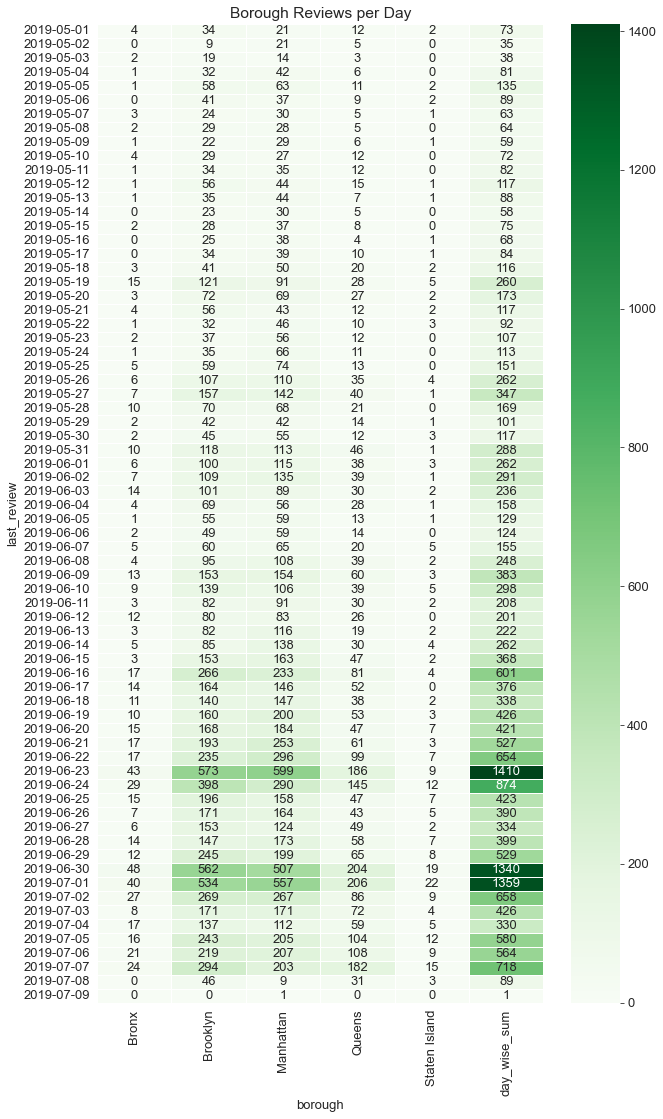

In [55]:
matplotlib.rcParams["font.size"] = 13
plt.figure(figsize = (10,18))
plt.title("Borough Reviews per Day")
sns.heatmap(borough_lr, fmt = "d", annot = True, cmap = "Greens", linewidths = .5);


As we can deduce from this visualisation, the highest number of review in a day is `1410` on the "23rd of June 2019". Brooklyn has the highest reviews in a day, this borough realized `599` reviews on "23rd of June 2019". this heatmap shows that Brooklyn and Manhattan have the highest day-wise reviews.

**room type:last review ( how often are certain room types reviewed ) scatter plot.**

In [56]:
room_type_lr = (latest_reviews.copy().groupby(latest_reviews.last_review.dt.date).room_type.value_counts()).unstack()
room_type_lr["day_wise_sum"] = room_type_lr.sum(axis = 1)
room_type_lr.astype(int)
room_type_lr

,entire home/apt,private room,shared room,day_wise_sum
last_review,,,,
2019-05-01,35,35,3,73
2019-05-02,23,11,1,35
2019-05-03,14,23,1,38
2019-05-04,33,45,3,81
2019-05-05,61,69,5,135
...,...,...,...,...
2019-07-05,317,257,6,580
2019-07-06,314,239,11,564
2019-07-07,394,313,11,718


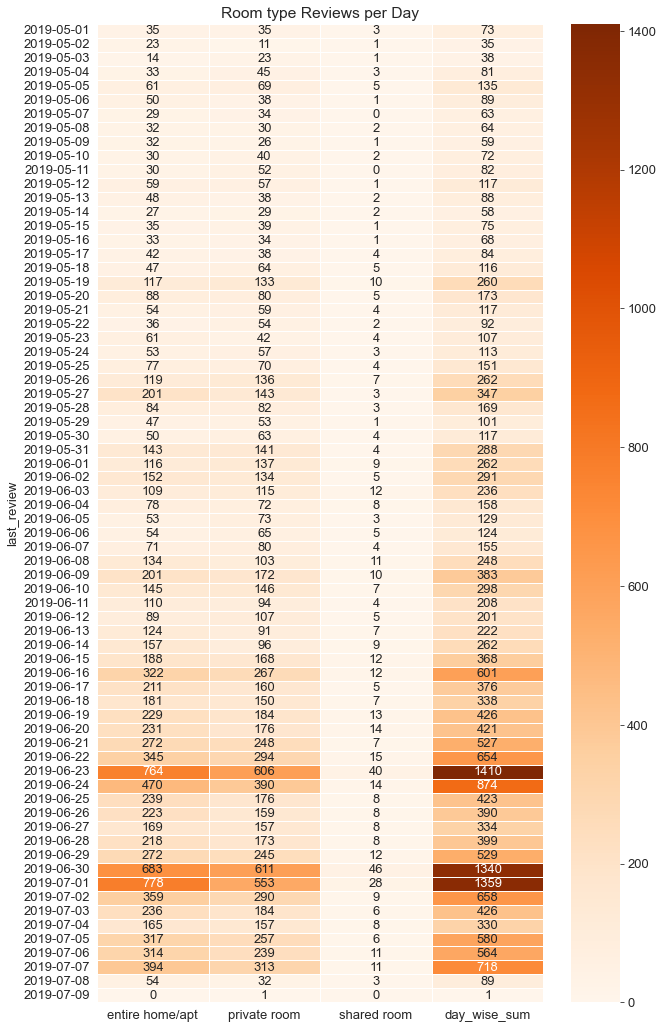

In [57]:
# styling
matplotlib.rcParams["font.size"] = 13
plt.figure(figsize = (10,18))

# let us have a heatmap showing the room type preferences accross the days.
plt.title("Room type Reviews per Day")
sns.heatmap(room_type_lr, fmt = "d", annot = True, cmap = "Oranges", linewidths = .5);

for better understanding of the flow and figures let's have line plots to show what we have in the heatmap.

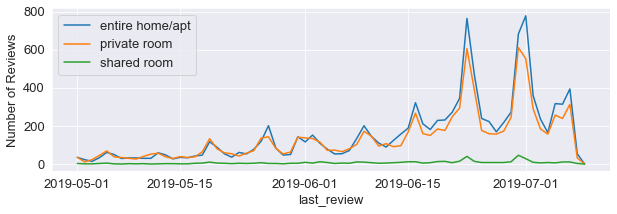

In [58]:
room_type_lr["entire home/apt"].plot(legend = True)
room_type_lr["private room"].plot(legend = True)
room_type_lr["shared room"].plot(legend = True)
plt.ylabel("Number of Reviews");

From the lineplots and heatmap combined it is evident that there doesn't seem to exist a change in room type prefrence over time. And there is a general increase in no of reviews day wise towards the end.


**Listing frequency: last review**

To see listing frequency per dates let's have an area plot showing this. All boroughs are represented and the total frequency is also represented. 

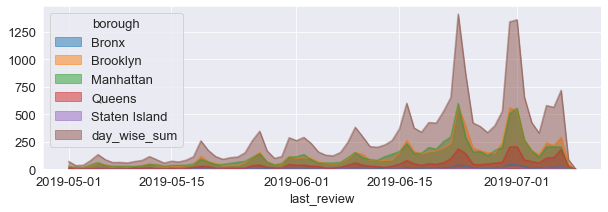

In [59]:
borough_lr.plot.area(stacked = False);

- insight: The World pride 2019 event that took place accross all 5 boroughs in new York might have caused the increased number of reviews experienced in June of 2019.
- also the increased stream in of reviews on airbnb listings on `30th June` and `1st of July` must have being due to preparation for the independence celebration in New York on the `4th of July`.

# Relationship Weekday

In [60]:
weekday_df = NY_rental_merged.copy()
weekday_df.drop(["description"], axis = 1, inplace = True)

In [61]:

outliers = weekday_df.loc[weekday_df["price"] >= 2001]
outliers
#weekday_df.sort_values("weekday")

,listing_id,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
1234,893413,entire home/apt,2500,2019-07-01,76041.67,Manhattan,East Village,1,0,7
9243,17666300,entire home/apt,2250,2019-07-01,68437.50,Manhattan,SoHo,1,0,7
9480,18094418,entire home/apt,2250,2019-06-15,68437.50,Manhattan,SoHo,15,5,6
11947,21701058,entire home/apt,2200,2019-03-02,66916.67,Manhattan,Hell's Kitchen,2,5,3
12508,22263855,entire home/apt,3000,2019-06-30,91250.00,Manhattan,SoHo,30,6,6
13528,23860219,entire home/apt,2990,2019-06-29,90945.83,Manhattan,Nolita,29,5,6
14282,25018204,entire home/apt,2500,2019-06-24,76041.67,Manhattan,Harlem,24,0,6
18430,30035166,entire home/apt,5000,2019-02-23,152083.33,Manhattan,Harlem,23,5,2
21731,33029434,entire home/apt,3613,2019-06-15,109895.42,Manhattan,Upper West Side,15,5,6
21838,33133321,entire home/apt,2600,2019-05-30,79083.33,Queens,Bayside,30,3,5


In [62]:
#removing outliers
weekday_df = weekday_df.loc[~(weekday_df["price"] > 2000)]
weekday_df

,listing_id,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,2595,entire home/apt,225,2019-05-21,6843.75,Manhattan,Midtown,21,1,5
1,3831,entire home/apt,89,2019-07-05,2707.08,Brooklyn,Clinton Hill,5,4,7
2,5099,entire home/apt,200,2019-06-22,6083.33,Manhattan,Murray Hill,22,5,6
3,5178,private room,79,2019-06-24,2402.92,Manhattan,Hell's Kitchen,24,0,6
4,5238,entire home/apt,150,2019-06-09,4562.50,Manhattan,Chinatown,9,6,6
...,...,...,...,...,...,...,...,...,...,...
25204,36425863,private room,129,2019-07-07,3923.75,Manhattan,Upper East Side,7,6,7
25205,36427429,private room,45,2019-07-07,1368.75,Queens,Flushing,7,6,7
25206,36438336,private room,235,2019-07-07,7147.92,Staten Island,Great Kills,7,6,7
25207,36442252,entire home/apt,100,2019-07-07,3041.67,Bronx,Mott Haven,7,6,7


**Hypothesis:** Weekday influences room type
**To check:** frequency of listing for each week day through out the period covered by this dataset against the week days.
A scatter plot will aid visualization.

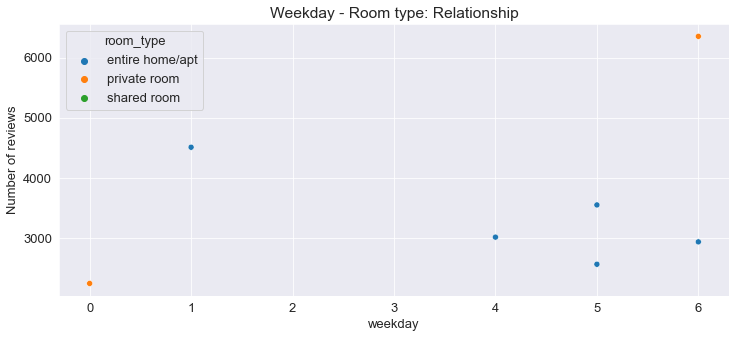

In [63]:
# y - frequency of review based on weekday
weekday_df[["weekday"]].value_counts()
# x - weekday
weekday_df.weekday
# hue - Room type
plt.figure(figsize = (12,5))
sns.scatterplot(y = weekday_df["weekday"].value_counts(),
                x = "weekday", 
                hue = "room_type", 
                data = weekday_df)
plt.ylabel("Number of reviews")
plt.title("Weekday - Room type: Relationship");

In [64]:
weekday_df[weekday_df["listing_id"] == 0]

,listing_id,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month


# QUESTIONS 

## Step 4: Ask & answer questions about the data
- Ask at least 4 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


So let us ask some really interesting questions about my dataset 

**Questions to ask about my dataset:**
- what boroughs have the cheapest rental prices?

- What are the available room types on Airbnb listings?
- Which room type is the cheapest?
- What months have the highest number of reviews?
- What boroughs are the most expensive?
- What boroughs are the least expensive?

**Q1: What boroughs have the cheapest rental prices?**

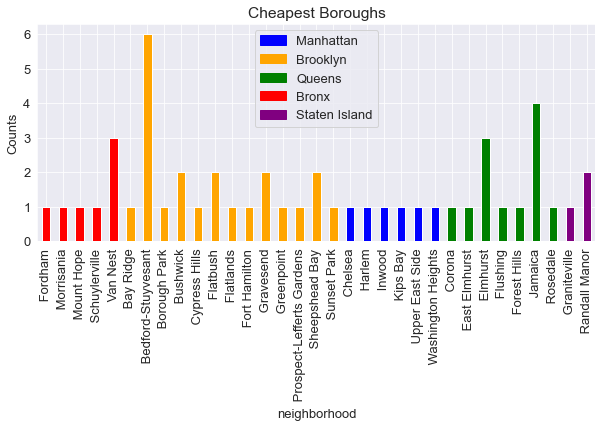

In [65]:
# configure styles.
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 13
matplotlib.rcParams["figure.figsize"] = (10,4)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

#define plot
axes = plt.plot(0,0)

#get cheapest listing.
cheapest_boroughs = NY_rental_merged.sort_values("price").head(50)

#make borough the index
cheapest_boroughs = cheapest_boroughs.groupby(["borough","neighborhood"]).count().reset_index("borough")

#creating a new dataframe of selected columns.
cheapest_boroughs = cheapest_boroughs[["borough","listing_id"]]

#Our listing id now represent counts of each neighbourhood among the cheapest 50 boroughs.

cheapest_boroughs.rename({"listing_id":"number_of_rentals"}, axis = 1, inplace = True)


#plot 
colours = {"Manhattan":"blue",
           "Brooklyn":"orange",
           "Queens":"green",
           "Bronx":"red",
           "Staten Island":"purple"}

labels = list(colours.keys())

handles = [plt.Rectangle((0,0), 1,1, color = colours[label]) for label in labels]

axes[0] = cheapest_boroughs["number_of_rentals"].plot(kind = "bar",
                                                      color = [colours[i] for i in cheapest_boroughs["borough"]])

axes[0].set_title("Cheapest Boroughs")
axes[0].set_ylabel("Counts")
axes[0].legend(handles, labels);



Brooklyn has the highest counts of cheapest prices in NYC.

In [66]:
NY_rental_merged

,listing_id,description,room_type,price,last_review,price_per_month,borough,neighborhood,day,weekday,month
0,2595,Skylit Midtown Castle,entire home/apt,225,2019-05-21,6843.75,Manhattan,Midtown,21,1,5
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,2019-07-05,2707.08,Brooklyn,Clinton Hill,5,4,7
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,2019-06-22,6083.33,Manhattan,Murray Hill,22,5,6
3,5178,Large Furnished Room Near B'way,private room,79,2019-06-24,2402.92,Manhattan,Hell's Kitchen,24,0,6
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,2019-06-09,4562.50,Manhattan,Chinatown,9,6,6
...,...,...,...,...,...,...,...,...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,private room,129,2019-07-07,3923.75,Manhattan,Upper East Side,7,6,7
25205,36427429,No.2 with queen size bed,private room,45,2019-07-07,1368.75,Queens,Flushing,7,6,7
25206,36438336,Seas The Moment,private room,235,2019-07-07,7147.92,Staten Island,Great Kills,7,6,7
25207,36442252,1B-1B apartment near by Metro,entire home/apt,100,2019-07-07,3041.67,Bronx,Mott Haven,7,6,7


**Q2: What are the available room types on Airbnb listings?**

In [67]:
# Available room types.
room_types = NY_rental_merged.room_type.value_counts()
print(f"The room types available on the NYC Airbnb listings are:\n" f"{room_types}")

The room types available on the NYC Airbnb listings are:
entire home/apt    13266
private room       11341
shared room          585
Name: room_type, dtype: int64


**Q3: What room types are the cheapest?**

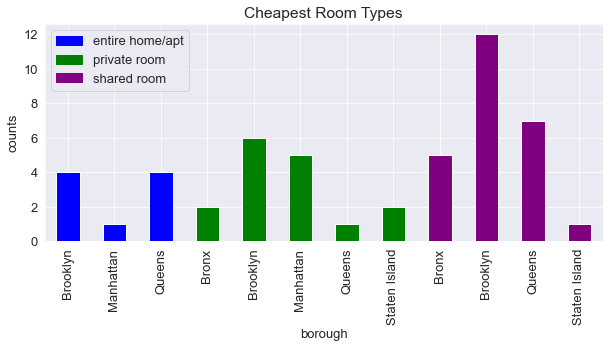

In [68]:
# Get cheapest room types.
cheapest_roomtypes = NY_rental_merged.sort_values("price").head(50)

cheapest_roomtypes = cheapest_roomtypes.groupby(["room_type","borough"]).count().reset_index("room_type")
cheapest_roomtypes = cheapest_roomtypes[["room_type","listing_id"]]
cheapest_roomtypes.rename({"listing_id":"number_of_reviews"}, axis = 1, inplace = True)

#Remove records with no number of review
cheapest_roomtypes = cheapest_roomtypes[cheapest_roomtypes["number_of_reviews"] != 0]
cheapest_roomtypes

colours = {"entire home/apt":"blue", 
           "private room":"green", 
           "shared room":"purple"}

labels = list(colours.keys())

handles = [plt.Rectangle((0,0), 1,1, color = colours[label]) for label in labels]

cheapest_roomtypes["number_of_reviews"].plot(kind = "bar",
                        color = [colours[i] for i in cheapest_roomtypes["room_type"]])

#axes[0] = most_expensives["number_of_rentals"].plot(kind = "bar", 
#                                                    color = [colours[i] for i in most_expensives["borough"]])


plt.title("Cheapest Room Types")
plt.ylabel("counts")
plt.legend(handles, labels);

From this visualization, the cheapest room type is the `shared room` and we have a relatively large number of them i `Brooklyn`.

**Q4: What months have the highest number of reviews?**

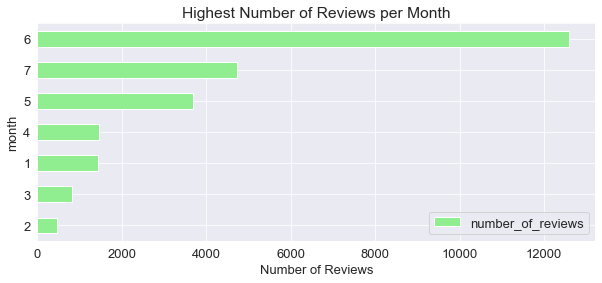

In [69]:
#Getting the ordered reviews per month in descending other.
highest_monthly_review = NY_rental_merged.groupby(["month"]).count()
highest_monthly_review.rename({"listing_id":"number_of_reviews"}, axis = 1, inplace = True)
highest_monthly_review = highest_monthly_review[["number_of_reviews"]].sort_values("number_of_reviews", ascending = True)

highest_monthly_review.plot(kind = "barh",
                           color = "lightgreen")
plt.title("Highest Number of Reviews per Month")
plt.xlabel("Number of Reviews");

In [70]:
highest_monthly_review

,number_of_reviews
month,
2,470
3,820
1,1440
4,1456
5,3694
7,4725
6,12587


**Q5: What boroughs are the most expensive?**

Let's set the most expensives to rental apartments with their price higher than $500 and explore. 

In [71]:
# most expensives
most_expensives = NY_rental_merged[NY_rental_merged["price"] >= 500]
most_expensives = most_expensives.groupby(["borough"]).count()
most_expensives = most_expensives[["listing_id"]]
most_expensives.rename({"listing_id":"number_of_reviews"}, axis = 1, inplace = True)
most_expensives = most_expensives.sort_values("number_of_reviews", ascending = False)
most_expensives

,number_of_reviews
borough,
Manhattan,354
Brooklyn,119
Queens,8
Bronx,1


Just 482 apartments on airbnb listings in New York city met the requirement.

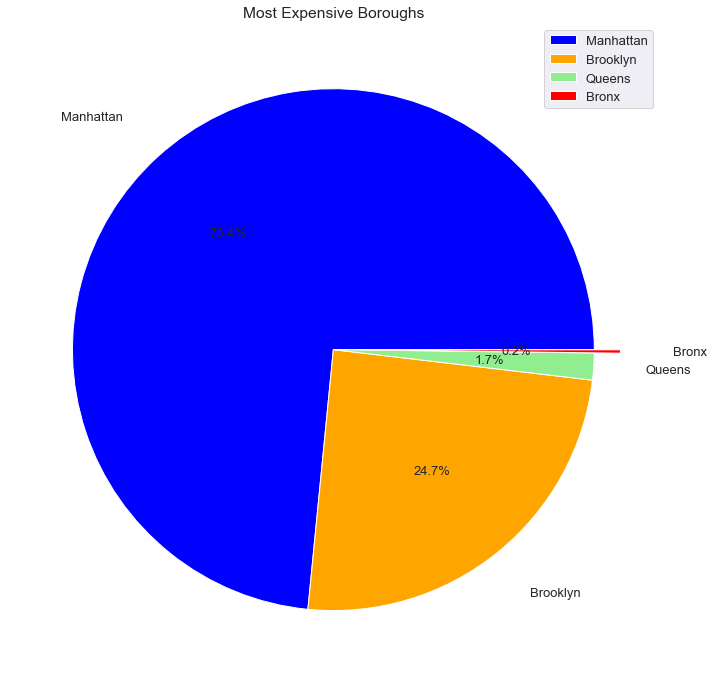

In [72]:
# visualization

plt.rcParams["figure.figsize"] = (12,12)

colours = {"Manhattan":"blue",
           "Brooklyn":"orange",
           "Queens":"lightgreen",
           "Bronx":"red"}

labels = list(colours.keys())

sizes = list(most_expensives.number_of_reviews)

plt.pie(sizes,
        colors = colours.values(),
        explode = [0.0 ,0.0 ,0.0 ,0.1],
        labels = labels ,
        labeldistance = 1.2, 
        autopct = "%1.1f%%")
plt.title("Most Expensive Boroughs")
plt.legend();



Yeah, Manhattan has most of the expensive apartments in it, Staten Island doesn't seem to contain any rental apartment that can be tagged as most expensive; meaning there is no rental apartment in Staten Island that costs up to $500 in price per night.

In [73]:
!pip install jovian --upgrade --quiet

In [74]:
import jovian

In [75]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mtsokanlawon/course-project-exploratory-data-analysis-copy1" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/mtsokanlawon/course-project-exploratory-data-analysis-copy1


'https://jovian.com/mtsokanlawon/course-project-exploratory-data-analysis-copy1'

## Other Resources
Here are links to some other resources you should check out, they have been of source of insight and inspiration on what to do during the course of this project.
- [Measures of Central Tendency](https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/measures-central-tendency#:~:text=Measures%20of%20shape-,Definition,or%20centre%20of%20its%20distribution.)
- 
- 
- 